<a href="https://colab.research.google.com/github/nehamahanand07/Transfer_learning_2_brain/blob/main/Transfer_learning_2_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224] #bcz we using vgg image size and weights from vgg info

train_data='/content/drive/MyDrive/Brain_Tumor/Training'
test_data='/content/drive/MyDrive/Brain_Tumor/Testing'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [ ]:
#MUst, we should not train so trainable=False
for i in vgg.layers:
  i.trainable=False

In [ ]:
#to flatten pooling layer output which is in vgg.output
x=Flatten()(vgg.output)
prediction=Dense(4,activation='softmax')(x)

#if needed hidden layer can be added before prediction, here time consuming



In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#to preprocess training data
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_data,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 5529 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
r=model.fit(training_set,validation_data=testing_set,epochs=5)

Epoch 1/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 3428s 20s/step - accuracy: 0.7278 - loss: 0.7187 - val_accuracy: 0.8291 - val_loss: 0.5194
Epoch 2/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 102s 589ms/step - accuracy: 0.8878 - loss: 0.2980 - val_accuracy: 0.9062 - val_loss: 0.2655
Epoch 3/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 97s 560ms/step - accuracy: 0.9238 - loss: 0.2199 - val_accuracy: 0.9108 - val_loss: 0.2374
Epoch 4/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 99s 574ms/step - accuracy: 0.9397 - loss: 0.1666 - val_accuracy: 0.9161 - val_loss: 0.2331
Epoch 5/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 142s 572ms/step - accuracy: 0.9291 - loss: 0.1949 - val_accuracy: 0.9321 - val_loss: 0.1597


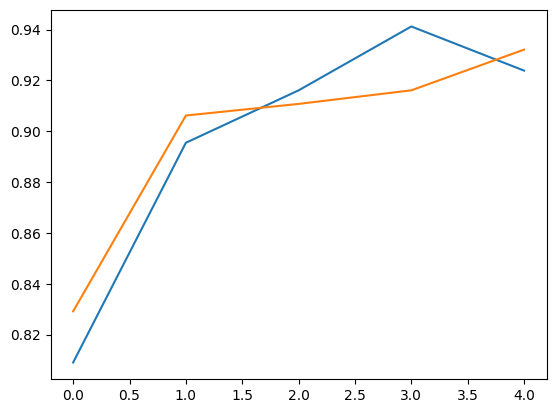

In [ ]:
plt.plot(r.history['accuracy'],label='Training data performance')
plt.plot(r.history['val_accuracy'],label='Testing data performance')

In [ ]:
#predicting with a new image
from skimage.io import imread
from skimage.transform import resize

In [ ]:
def predict_img(imgpath,model):
  img=imread(imgpath)
  img_resized=resize(img,(224,224))
  # print(img_resized.shape)
  img_resized=img_resized.reshape(1,224,224,3) #extra reshape adding
  pred=model.predict(img_resized)
  print(pred)
  ind=pred.argmax()
  print(ind)
  datadir=['glioma','pituitary','notumor','meningioma']
  datadir.sort()
  print(datadir[ind])

In [ ]:
imgpath='/content/drive/MyDrive/Brain_Tumor/Training/glioma/Tr-glTr_0000.jpg'
predict_img(imgpath,model)